In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
ndata = pd.read_csv("NextData.csv")

In [35]:
ndata.head()

,Advertiser,Advertiser ID,Advertiser Status,Advertiser Integration Code,Time of Day,Country,Device Type,Advertiser Currency,Impressions,Active View: Measurable Impressions,Active View: Viewable Impressions,Clicks,Revenue (Adv Currency)
0,Next_UK_Zenith,378754,Active,NaN,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673
1,Next_UK_Zenith,378754,Active,NaN,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391
2,Next_UK_Zenith,378754,Active,NaN,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858
3,Next_UK_Zenith,378754,Active,NaN,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433
4,Next_UK_Zenith,378754,Active,NaN,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097


In [36]:
ndata = ndata.drop(ndata.index[336::])

In [37]:
ndata = ndata.drop(["Advertiser ID", "Advertiser Status", "Advertiser Integration Code"], axis=1)

In [38]:
ndata.columns

Index(['Advertiser', 'Time of Day', 'Country', 'Device Type',
       'Advertiser Currency', 'Impressions',
       'Active View: Measurable Impressions',
       'Active View: Viewable Impressions', 'Clicks',
       'Revenue (Adv Currency)'],
      dtype='object')

In [39]:
ndata.columns=['Advertiser', 'TOD', 'Country', 'DeviceType',
       'AdvertiserCurrency', 'Impressions',
       'MeasurableImpressions',
       'ViewableImpressions', 'Clicks',
       'Spend']

In [40]:
ndata.head()

,Advertiser,TOD,Country,DeviceType,AdvertiserCurrency,Impressions,MeasurableImpressions,ViewableImpressions,Clicks,Spend
0,Next_UK_Zenith,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673
1,Next_UK_Zenith,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391
2,Next_UK_Zenith,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858
3,Next_UK_Zenith,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433
4,Next_UK_Zenith,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097


In [41]:
ndata["CTR"] = ndata.Clicks / ndata.Impressions
ndata["CPM"] = ndata.Spend / ndata.Impressions * 1000
ndata["Viewability"] = ndata.ViewableImpressions / ndata.MeasurableImpressions

In [42]:
ndata.Country = ndata.Country.astype("category")
ndata.DeviceType = ndata.DeviceType.astype("category")

In [43]:
ndata.head()

,Advertiser,TOD,Country,DeviceType,AdvertiserCurrency,Impressions,MeasurableImpressions,ViewableImpressions,Clicks,Spend,CTR,CPM,Viewability
0,Next_UK_Zenith,0.0,DE,Desktop,GBP,16033.0,15214.0,4048.0,3.0,15.064673,0.000187,0.939604,0.266071
1,Next_UK_Zenith,0.0,HK,Desktop,GBP,24158.0,23581.0,9229.0,19.0,51.533391,0.000786,2.133181,0.391374
2,Next_UK_Zenith,1.0,DE,Desktop,GBP,31903.0,30341.0,7678.0,6.0,25.592858,0.000188,0.802209,0.253057
3,Next_UK_Zenith,1.0,GB,Desktop,GBP,94044.0,92256.0,57478.0,157.0,301.121433,0.001669,3.201921,0.623027
4,Next_UK_Zenith,1.0,GB,Tablet,GBP,53025.0,48877.0,25243.0,49.0,125.552097,0.000924,2.367791,0.516460


---

In [44]:
#below we explore FacetGrid
#FacetGrid is similar to subplots and it also takes subplots_kws
#Subplots create plots then populate with plots 
#whereas FacetGrid just separate into multiple dimensions
#a bit similar to how lmplot is able to use row="" and col="" to separate into multiple plots

In [45]:
#creating FacetGrid has two steps
#1. creating the FacetGrid frame 
#2. using Facetgrip.map() to populate it with its data

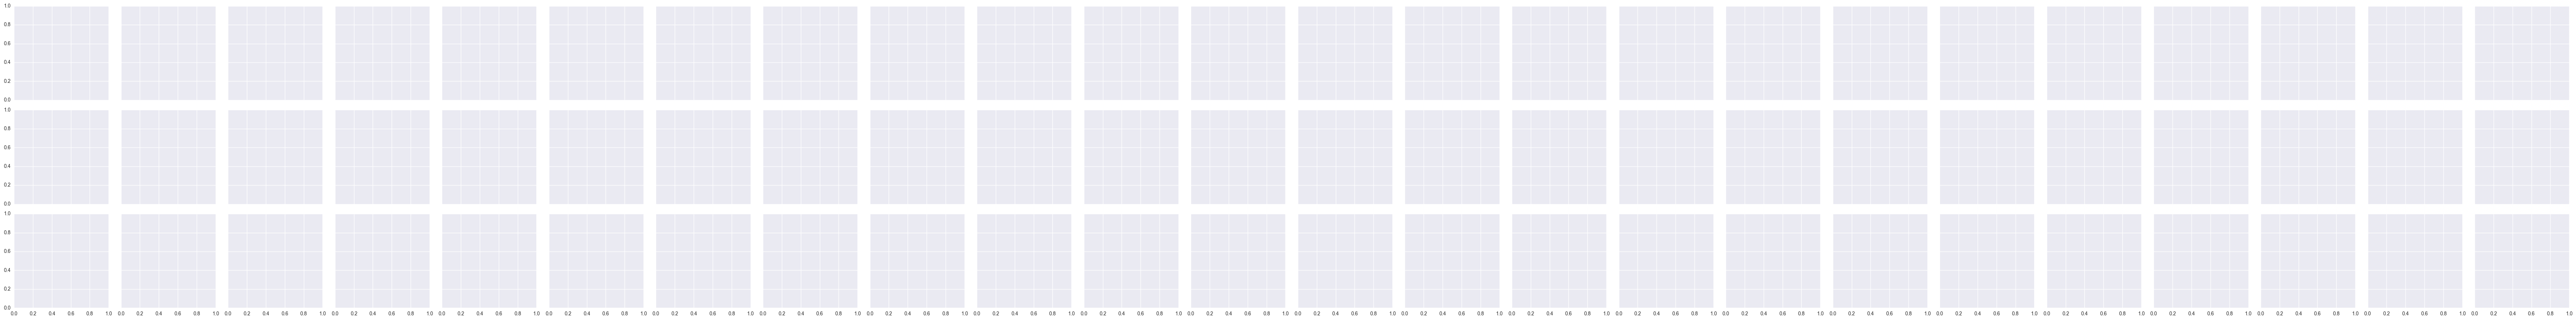

In [46]:
#here we start with step 1:
#here we create a FacetGrid first which breaks down by TOD as columns and DeviceType as rows
sns.FacetGrid(data=ndata, col="TOD", row="DeviceType", hue="DeviceType")

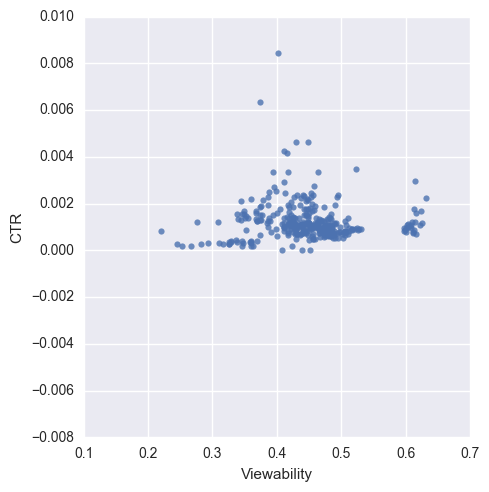

In [47]:
#assuming we were to create a normal lmplot on Viewability and CTR
sns.lmplot(data=ndata, x="Viewability", y="CTR", fit_reg=False)
#we then just extract this info into FacetGrid 

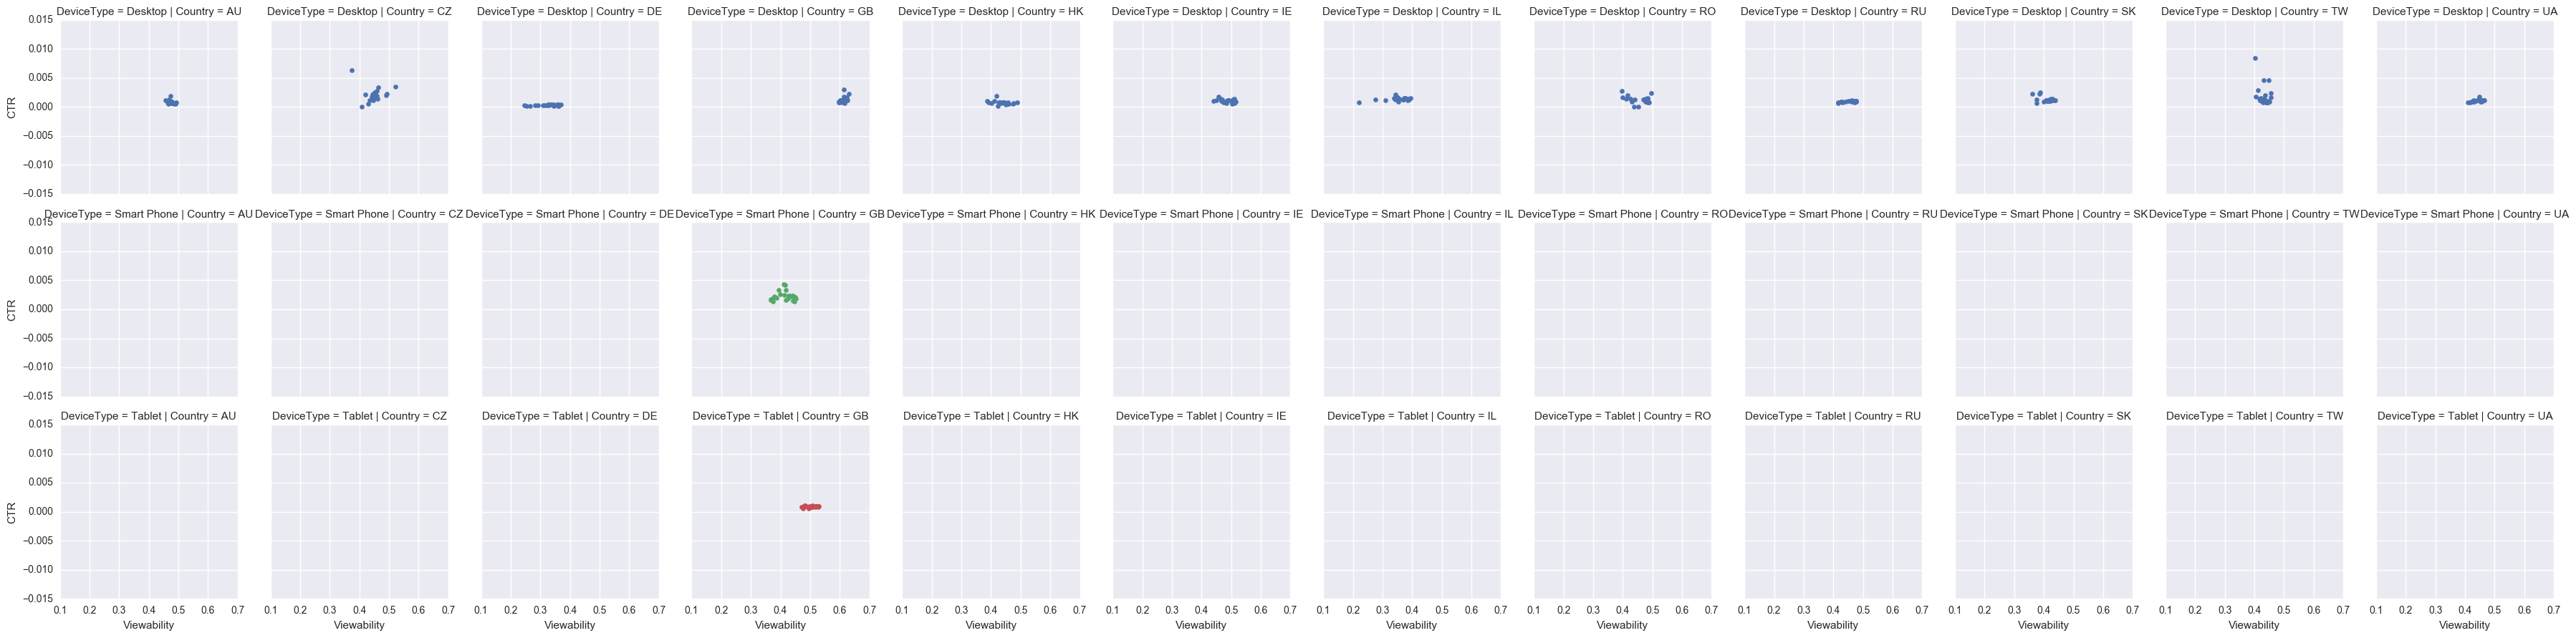

In [49]:
#here we do the second step:
#sns.FacetGrid.map(function, "the parameter name of x", "the parameter name of y")
#(on above) functino being the type of plots you want to populate onto FacetGrid; 
#x="" and y="" without specifying x and y
#then run both first and second step together
ccc = sns.FacetGrid(ndata, col="Country", row="DeviceType", hue="DeviceType")
ccc = ccc.map(plt.scatter, "Viewability", "CTR")

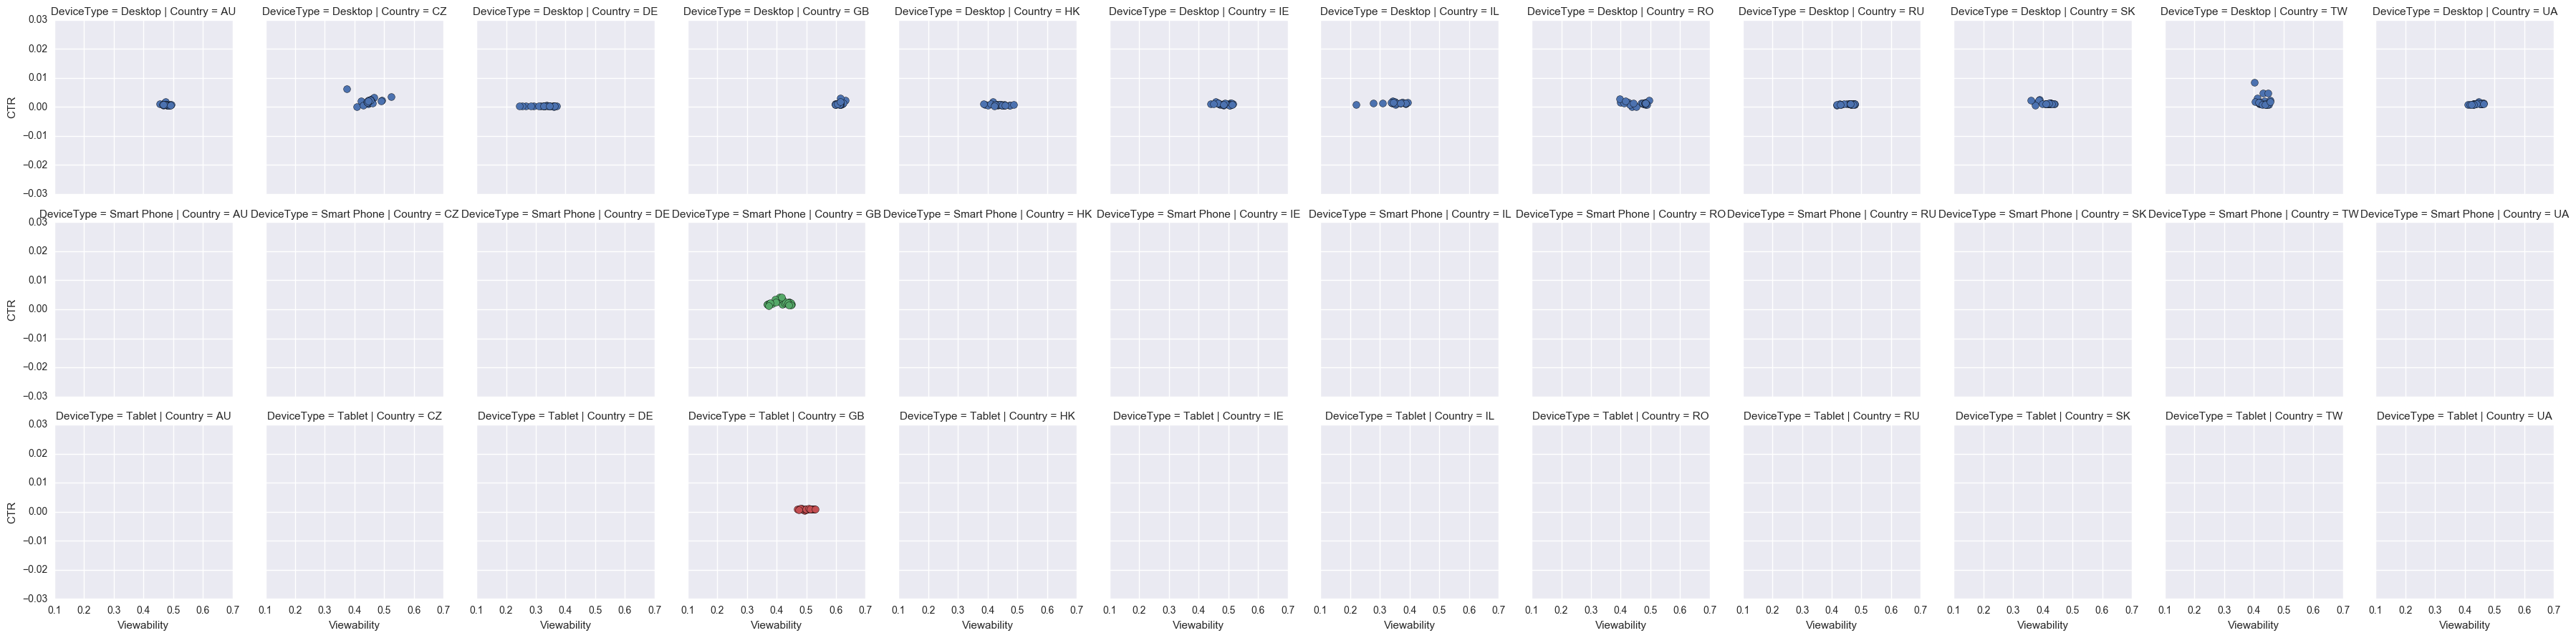

In [50]:
#we can then set additional customisation using kws in the map() as map(**kws)
ccc = sns.FacetGrid(ndata, col="Country", row="DeviceType", hue="DeviceType")
kws = dict(s=50, edgecolor="black")
ccc = ccc.map(plt.scatter, "Viewability", "CTR", **kws)